In [54]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [55]:
# 插值
data=np.loadtxt('./transfer-function.txt',skiprows=1)
data_lgk=np.log10(data[:,0])
data_lgTk=np.log10(data[:,1])
lgTk_interp=interp1d(data_lgk,data_lgTk,kind='cubic')
def Tk(k):
    return 10 ** lgTk_interp(np.log10(k))[()]

k=1e-3
a=Tk(k)
print('k=',k,'Tk=',a)

k= 0.001 Tk= 0.984495401382446


In [56]:
A_s=1
h=0.6774
R=8*h**(-1)
n_s=0.96

In [57]:
#窗函数
def W(k,R):
    return (3*(np.sin(k*R)-(k*R)*np.cos(k*R)))/(k*R)**3

In [58]:
def P_CDM(k):
    return A_s*k**n_s*Tk(k)**2

In [59]:
#积分
def sigma_noint(k):
    return (np.pi * k**2)/((2*np.pi)**3)*P_CDM(k)*W(k,R)**2

In [60]:
sigma2,err=quad(sigma_noint,0.0,float('inf'),epsrel=1e-3)

In [61]:
A_s=(0.82)**2/A_s

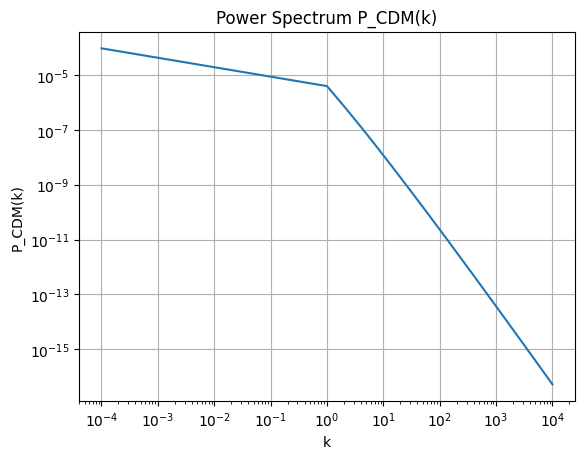

In [63]:
import matplotlib.pyplot as plt
k_min = 10e-5  # 最小 k 值
k_max = 10e3  # 最大 k 值
num_points = 10000  # 点的数量

k_values = np.linspace(k_min, k_max, num_points)
P_values = P_CDM(k_values)

plt.plot(k_values, P_values)
plt.xscale('log')  # 应用对数刻度于 x 轴
plt.yscale('log')  # 应用对数刻度于 y 轴
plt.xlabel('k')
plt.ylabel('P_CDM(k)')
plt.title('Power Spectrum P_CDM(k)')
plt.grid(True)

plt.show()
